In [1]:
import numpy as np
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel
from tr_functions.kppv import KppvModel
from tr_functions.parzen import ParzenModel

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

In [3]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp1_app)
# gaussian_model.print_classes_centers()
# gaussian_model.show_train_plot()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp1_dec)
# gaussian_model.print_model_result()


In [4]:
# kppv = KppvModel()
# kppv.k = 5
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp2_app, 10, 5)
# kppv.print_k_results_cv()
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.plot_all_data()
# kppv.print_model_result()
# print(kppv.k)

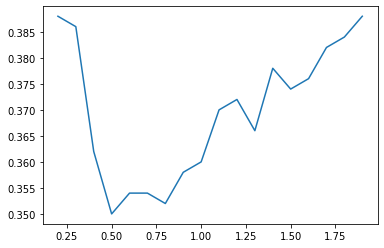

[(0.2, 0.6119999999999999), (0.30000000000000004, 0.614), (0.4000000000000001, 0.6380000000000001), (0.5000000000000001, 0.65), (0.6000000000000001, 0.6459999999999999), (0.7000000000000002, 0.6459999999999999), (0.8000000000000003, 0.648), (0.9000000000000001, 0.642), (1.0000000000000002, 0.64), (1.1000000000000003, 0.6300000000000001), (1.2000000000000004, 0.6279999999999999), (1.3000000000000003, 0.634), (1.4000000000000004, 0.622), (1.5000000000000004, 0.626), (1.6000000000000003, 0.624), (1.7000000000000004, 0.618), (1.8000000000000005, 0.616), (1.9000000000000006, 0.612)]
The best h found is 0.5000000000000001 with a error rate = 0.35


In [5]:
# parzen = ParzenModel()
# h_list = np.arange(0.2, 2, 0.1)
# parzen.method = "gaussian"
# parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
# parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
# parzen.print_model_result()